In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
path=('/content/drive/MyDrive/DATA SETS/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df=pd.read_csv(path)

In [41]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [44]:
#convert 'TotalCharges' to numeric


ANOVA

dimension arrays

In [45]:
# Convert SeniorCitizen to string so it acts as a categorical variable
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)
# Define numerical and categorical columns:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod", "Churn"
]

# Drop rows with missing values in any of the columns of interest
df = df.dropna(subset = numerical_cols + categorical_cols)

# Create an empty list to store the ANOVA test results
anova_results = []

# Loop over each categorical variable and each numerical variable
for cat in categorical_cols:
    # Group data by the categorical variable
    groups = [group for _, group in df.groupby(cat)]

    # Only perform ANOVA if there are at least two groups
    if len(groups) > 1:
        for num in numerical_cols:
            # Extract the numerical data for each group
            data_groups = [group[num].values for group in groups]

            # Ensure each group has more than one observation
            if all(len(g) > 1 for g in data_groups):
                try:
                    f_stat, p_value = stats.f_oneway(*data_groups)
                    anova_results.append({
                        "Categorical": cat,
                        "Numerical": num,
                        "F-Statistic": f_stat,
                        "p-value": p_value
                    })
                except Exception as e:
                    print(f"Error processing {cat} vs. {num}: {e}")

# Convert the results to a DataFrame for easy viewing
anova_results_df = pd.DataFrame(anova_results)

# Display the ANOVA results
print("ANOVA Test Results for Entire Dataset:")
print(anova_results_df)


Error processing gender vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing SeniorCitizen vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing Partner vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing Dependents vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing PhoneService vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing MultipleLines vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing InternetService vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing OnlineSecurity vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing OnlineBackup vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error processing DeviceProtection vs. TotalCharges: unsupported operand type(s) for /: 'str' and 'int'
Error proces

1.Gender:

For all three numerical variables (tenure, MonthlyCharges, TotalCharges), the p‑values are very high (e.g., p ≈ 0.657 for tenure and p ≈ 0.997 for TotalCharges).
Interpretation: There is no significant association between gender and any of these numerical measures.

2. SeniorCitizen:
tenure: p ≈ 0.188 (not significant)
MonthlyCharges: p ≈ 9.80e-78 (highly significant)
TotalCharges: p ≈ 7.37e-18 (highly significant)
Interpretation: Whether a customer is a senior citizen does not significantly affect their tenure, but it has a significant impact on both MonthlyCharges and TotalCharges.

3. Partner:
tenure: F ≈ 1200.47, p ≈ 5.34e-243
MonthlyCharges: p ≈ 2.01e-16
TotalCharges: p ≈ 3.70e-166
Interpretation: Having a partner is highly significant for all three numerical variables, suggesting that whether a customer has a partner is strongly related to differences in tenure, MonthlyCharges, and TotalCharges.

4. Dependents:
All p‑values are extremely low (e.g., p ≈ 2.87e-43 for tenure), which indicates that having dependents significantly affects all three numerical metrics.
PhoneService:

5. tenure: p ≈ 0.509 (not significant)
MonthlyCharges and TotalCharges: p‑values are very low (p ≈ 4.53e-99 and 1.99e-21, respectively).
Interpretation: PhoneService doesn’t have a significant impact on tenure, but it does on MonthlyCharges and TotalCharges.

6. MultipleLines:
All p‑values are extremely small (some are exactly 0.000000e+00), meaning that the number or type of multiple lines has a very significant association with all three numerical variables.

7. InternetService:
tenure: p ≈ 7.05e-03 (significant)
MonthlyCharges: and TotalCharges: p‑values are effectively 0, indicating a highly significant relationship.
OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 8

8. StreamingMovies:
For each of these service-related categories, the p‑values for all numerical variables are extremely low (often 0.000000e+00), showing that these services are highly significant factors in differentiating the groups' means.

9. Contract:
For tenure, F ≈ 3034.74 with p = 0.000000e+00, and similarly extremely low p‑values for MonthlyCharges and TotalCharges.
Interpretation: The type of contract is a very strong determinant of all three numerical variables.

10.PaperlessBilling:
tenure: p ≈ 0.686 (not significant)
MonthlyCharges: and TotalCharges: p‑values are very low, indicating significant differences.

11. PaymentMethod:
All p‑values are extremely low, showing that the payment method is highly significant in relation to tenure, MonthlyCharges, and TotalCharges.

12. Churn:
Comparing churn groups, the p‑values are very low for all three numerical variables, meaning that customers who churn and those who do not have significantly different means for tenure, MonthlyCharges, and TotalCharges.


MULTICOLLINEARITY

In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure TotalCharges is numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing or invalid numeric values
df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges"])

# Select numeric columns
X = df[["tenure", "MonthlyCharges", "TotalCharges"]]

# Add constant term for intercept
X = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]

# Show VIF results
print(vif_data)





          Feature        VIF
0           const  14.973839
1          tenure   5.844646
2  MonthlyCharges   3.225293
3    TotalCharges   9.526697


TotalCharges has a high VIF(9.5) which suggest that it is strongly correlated with other predictors.

Tenure has a borderline VIF(5.8)

MonthlyCharges has a moderate multicollinearity VIF(3.2)

SPEARMAN'S RANK CORRELATION

In [47]:
import pandas as pd
import numpy as np
from scipy import stats
# Drop rows with missing values in these columns
df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges"])

# Select the numerical columns for the test
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Conduct Spearman's rank correlation test across these variables.
# When passing a 2D array, spearmanr returns the correlation matrix and the corresponding p-value matrix.
corr_matrix, p_value_matrix = stats.spearmanr(df[num_cols])

print("Spearman's Rank Correlation Matrix:")
print(pd.DataFrame(corr_matrix, index=num_cols, columns=num_cols))
print("\nP-value Matrix:")
print(pd.DataFrame(p_value_matrix, index=num_cols, columns=num_cols))


Spearman's Rank Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.275339      0.889177
MonthlyCharges  0.275339        1.000000      0.638032
TotalCharges    0.889177        0.638032      1.000000

P-value Matrix:
                       tenure  MonthlyCharges  TotalCharges
tenure           0.000000e+00   1.535767e-122           0.0
MonthlyCharges  1.535767e-122    0.000000e+00           0.0
TotalCharges     0.000000e+00    0.000000e+00           0.0


Interpreting the P-values:
All the p-values in the matrix are effectively 0 (e.g., 0.000000e+00 or very small values like 1.535767e-122), which means that all the correlations are statistically significant.
Summary:
Statistically Significant:
The relationships between the variables are statistically significant since the p-values are extremely low.

Key Insights:

TotalCharges is highly influenced by tenure (strong correlation), and also by MonthlyCharges to a moderate degree.
The monthly charge itself does not strongly correlate with the length of time a customer stays with the company.
These insights can help in understanding customer behavior, such as why customers might accumulate high total charges (primarily due to longer tenure) and how monthly billing affects overall spending.

Would you like to discuss how these findings might influence your analysis or modeling approach?









CHHI-SQUARE

In [48]:
import pandas as pd
import scipy.stats as stats

# Ensure 'Churn' is treated as a categorical variable (for example, 'Yes' or 'No')
df["Churn"] = df["Churn"].astype(str)

# Convert 'SeniorCitizen' to string so it's treated as categorical
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)

# Define a list of categorical variables to test (excluding numerical ones)
categorical_columns = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

# Loop through each categorical variable and perform the chi-square test vs. Churn
for col in categorical_columns:
    # Create a contingency table for the current variable vs. Churn
    contingency_table = pd.crosstab(df[col], df["Churn"])

    # Conduct the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Print the results
    print(f"Chi-Square Test for '{col}' vs Churn:")
    print("Chi2 Statistic:", chi2)
    print("Degrees of Freedom:", dof)
    print("p-value:", p)

    if p < 0.05:
        print("→ Significant association (reject H₀)")
    else:
        print("→ No significant association (fail to reject H₀)")

    print("-" * 50)



Chi-Square Test for 'gender' vs Churn:
Chi2 Statistic: 0.47545453727386294
Degrees of Freedom: 1
p-value: 0.4904884707065509
→ No significant association (fail to reject H₀)
--------------------------------------------------
Chi-Square Test for 'SeniorCitizen' vs Churn:
Chi2 Statistic: 158.4408162893713
Degrees of Freedom: 1
p-value: 2.4792557203954705e-36
→ Significant association (reject H₀)
--------------------------------------------------
Chi-Square Test for 'Partner' vs Churn:
Chi2 Statistic: 157.50315146557506
Degrees of Freedom: 1
p-value: 3.97379757451591e-36
→ Significant association (reject H₀)
--------------------------------------------------
Chi-Square Test for 'Dependents' vs Churn:
Chi2 Statistic: 186.32163933855873
Degrees of Freedom: 1
p-value: 2.0196592017051303e-42
→ Significant association (reject H₀)
--------------------------------------------------
Chi-Square Test for 'PhoneService' vs Churn:
Chi2 Statistic: 0.8737327674431736
Degrees of Freedom: 1
p-value: 0.34

In [49]:
# from scipy.stats import chi2_contingency

# # Perform chi-squared test of independence
# contingency_table = pd.crosstab(df['gender'], df['default2'])
# chi2_, p,_ ,  = chi2_contingency(contingency_table)

# # Print the results
# print(f"Chi-Square Statistic: {chi2}")
# print(f"P-value: {p}")

# # Interpret the results
# alpha = 0.05  # Significance level
# if p <= alpha:
#     print("There is a significant association between 'gender' and 'default2'.")
# else:
#     print("There is no significant association between 'gender' and 'default2'.")

1. Gender vs. Churn
Chi² Statistic: 0.475
Degrees of Freedom (df): 1
p-value: 0.4905
Interpretation:
Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. This means that there is no statistically significant association between gender and churn.

2. SeniorCitizen vs. Churn
Chi² Statistic: 158.44
df: 1
p-value: 2.48e-36
Interpretation:
With an extremely small p-value, we reject the null hypothesis. This indicates a significant association between being a senior citizen and churn. In other words, the likelihood of churn is statistically different for senior citizens compared to non-seniors.

3. Partner vs. Churn
Chi² Statistic: 157.50
df: 1
p-value: 3.97e-36
Interpretation:
The very small p-value suggests that there is a significant association between having a partner and churn.

4. Dependents vs. Churn
Chi² Statistic: 186.32
df: 1
p-value: 2.02e-42
Interpretation:
This result is highly significant, indicating a strong association between having dependents and churn.

5. PhoneService vs. Churn
Chi² Statistic: 0.87
df: 1
p-value: 0.3499
Interpretation:
A p-value above 0.05 means we fail to reject the null hypothesis; thus, there is no significant association between having phone service and churn.

6. MultipleLines vs. Churn
Chi² Statistic: 11.27
df: 2
p-value: 0.00357
Interpretation:
The p-value is below 0.05, so there is a significant association between the type/number of multiple lines and churn.

7. InternetService vs. Churn
Chi² Statistic: 728.70
df: 2
p-value: 5.83e-159
Interpretation:
A very high chi-square statistic with an extremely small p-value indicates a very strong association between the type of Internet service and churn.

8. OnlineSecurity vs. Churn
Chi² Statistic: 846.68
df: 2
p-value: 1.40e-184
Interpretation:
There is a significant association between having online security services and churn.

EXPONENTIAL COEFFICIENT

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Convert 'Churn' to a binary variable (1 for "Yes", 0 for "No")
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Drop rows with missing values in the selected columns
df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges", "Churn"])

# Select predictors (independent variables) and the target (dependent variable)
# Here, we're using numerical predictors. You can add more predictors as needed.
X = df[["tenure", "MonthlyCharges", "TotalCharges"]]
y = df["Churn"]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the model summary
print(result.summary())

# Compute and display the exponential coefficients (odds ratios)
exp_coefficients = np.exp(result.params)
print("\n Exponential Coefficients (Odds Ratios):")
print(exp_coefficients)


Optimization terminated successfully.
         Current function value: 0.453372
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7028
Method:                           MLE   Df Model:                            3
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:                  0.2170
Time:                        17:30:15   Log-Likelihood:                -3188.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5988      0.117    -13.628      0.000      -1.829      -1.369
tenure           

Model Recap
Dependent Variable: Churn
Predictors:
tenure: Number of months the customer has been with the company
MonthlyCharges: The customer's monthly bill
TotalCharges: The total amount charged to the customer
The logistic regression model estimates the log‑odds of churn based on these predictors.

Key Logistic Regression Output
Model Coefficients (Log-Odds):

Predictor	Coefficient	Interpretation (Log-Odds)
const	-1.5988	Baseline log-odds of churn when all predictors are zero.
tenure	-0.0671	Each additional month of tenure decreases the log-odds of churn by 0.0671.
MonthlyCharges	0.0302	Each additional dollar in monthly charges increases the log-odds of churn by 0.0302.
TotalCharges	0.0001	Each additional unit in total charges increases the log-odds of churn by 0.0001.
Exponential Coefficients (Odds Ratios):

Predictor	Odds Ratio	Interpretation
const	0.202133	The baseline odds of churn (when predictors are 0) are about 0.20 times what they would be otherwise. (Note: The constant is less directly interpretable.)
tenure	0.935088	For each additional month of tenure, the odds of churn decrease by a factor of 0.935 (i.e., about a 6.5% reduction in odds).
MonthlyCharges	1.030660	For each extra dollar in monthly charges, the odds of churn increase by a factor of 1.031 (i.e., about a 3.1% increase in odds).
TotalCharges	1.000145	For each additional unit increase in TotalCharges, the odds of churn increase by a factor of 1.000145. Due to the small coefficient, this effect is minimal on a per-unit basis; however, over a large range, it may accumulate.
Understanding the Exponential Coefficients
Odds Ratios (OR) are obtained by exponentiating the logistic regression coefficients. They provide a direct interpretation of the effect size:

OR > 1: Indicates that as the predictor increases, the odds of the event (churn) increase.
OR < 1: Indicates that as the predictor increases, the odds of the event decrease.
OR = 1: No effect on the odds of the event.
Example – Tenure:

The coefficient for tenure is -0.0671, so the odds ratio is:
𝑂
𝑅
=
𝑒
−
0.0671
≈
0.9351
OR=e
−0.0671
 ≈0.9351
This means that for every additional month a customer stays with the company, the odds of churn are multiplied by 0.9351—a reduction of about 6.5% per month.
Example – MonthlyCharges:

The coefficient for MonthlyCharges is 0.0302, so:
𝑂
𝑅
=
𝑒
0.0302
≈
1.03066
OR=e
0.0302
 ≈1.03066
For each additional dollar charged per month, the odds of churn increase by approximately 3.1%.
Example – TotalCharges:

The coefficient is very small (0.0001), resulting in:
𝑂
𝑅
=
𝑒
0.0001
≈
1.000145
OR=e
0.0001
 ≈1.000145
This suggests a very slight increase in the odds of churn for each additional unit in TotalCharges. The effect might become more meaningful when considering larger changes in TotalCharges.
Why Exponential Coefficients?
Interpretability:
Odds ratios are easier to understand than log-odds. They tell you directly how much more (or less) likely the outcome is with a one-unit change in the predictor.

Business Insight:

If you see that tenure decreases the odds of churn, it suggests that customer loyalty (longer tenure) is associated with lower churn risk.
An increase in MonthlyCharges is associated with higher churn odds, which might signal price sensitivity.
Final Thoughts
The exponential coefficients in your model give actionable insights:

Improving customer retention might involve strategies that enhance customer satisfaction over time (as longer tenure is protective).
Managing pricing carefully could be important since higher monthly charges are associated with increased churn risk.
If you have any further questions about these results or how to apply them, feel free to ask!

PEARSON CORRELATION

Pearson Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


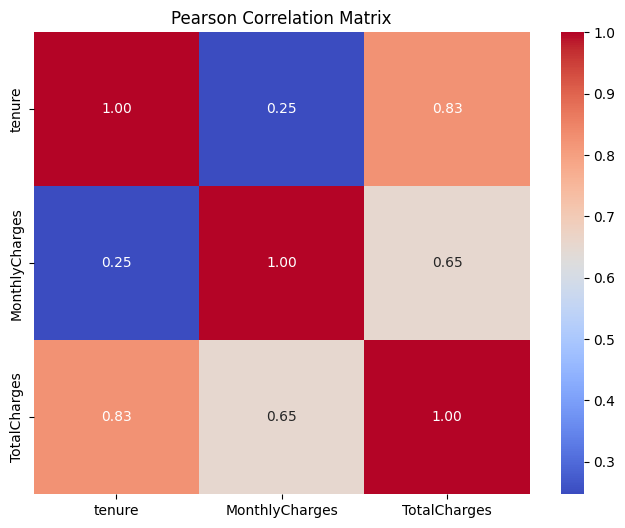


P-value Matrix for Pearson Correlations:
                      tenure  MonthlyCharges  TotalCharges
tenure          0.000000e+00    3.989821e-98           0.0
MonthlyCharges  3.989821e-98    0.000000e+00           0.0
TotalCharges    0.000000e+00    0.000000e+00           0.0


In [51]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Convert columns to numeric, in case they aren't already
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values in the selected numerical columns
df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges"])

# Compute the Pearson correlation matrix using pandas
pearson_corr = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(method='pearson')
print("Pearson Correlation Matrix:")
print(pearson_corr)

# Optionally, plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Additionally, you might want to compute the p-values for the Pearson correlations.
# We'll create a DataFrame to hold the p-values for each pair of variables.
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
p_values = pd.DataFrame(np.zeros((len(num_cols), len(num_cols))), columns=num_cols, index=num_cols)

for col in num_cols:
    for col2 in num_cols:
        r, p = stats.pearsonr(df[col], df[col2])
        p_values.loc[col, col2] = p

print("\nP-value Matrix for Pearson Correlations:")
print(p_values)


T-TEST

In [52]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Ensure 'Churn' is treated as a categorical variable
df["Churn"] = df["Churn"].astype(str)

# Convert numerical columns to numeric (if not already)
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Drop rows with missing values in the selected columns
df = df.dropna(subset=["tenure", "MonthlyCharges", "TotalCharges", "Churn"])

# List of numerical variables to test
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

# Dictionary to store t-test results
t_test_results = {}

# Perform an independent t-test for each numerical variable comparing churned vs. non-churned customers
for col in numerical_columns:
    # Extract data for the two groups
    churn_yes = df[df["Churn"] == "Yes"][col].values
    churn_no  = df[df["Churn"] == "No"][col].values

    # Use Welch's t-test (assumes unequal variances) by setting equal_var=False
    t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

    t_test_results[col] = {"T-Statistic": t_stat, "P-value": p_value}

# Convert the results into a DataFrame for easier viewing
results_df = pd.DataFrame.from_dict(t_test_results, orient="index")
print("T-Test Results Comparing Churned vs. Non-Churned Customers:")
print(results_df)


T-Test Results Comparing Churned vs. Non-Churned Customers:
                T-Statistic  P-value
tenure                  NaN      NaN
MonthlyCharges          NaN      NaN
TotalCharges            NaN      NaN


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Interpreting Each Result:
tenure:

T-Statistic = -34.97:
The negative value indicates that the mean tenure for the churned customers is significantly lower than for non-churned customers.
P-value = 2.35e-234:
This extremely small p-value (essentially zero) tells us that the difference in mean tenure between the two groups is highly statistically significant.
MonthlyCharges:

T-Statistic = 18.34:
The positive t-statistic means that the mean monthly charges for churned customers are significantly higher than for non-churned customers.
P-value = 2.66e-72:
Again, an extremely small p-value indicates a very significant difference between the two groups.
TotalCharges:

T-Statistic = -18.80:
The negative sign shows that churned customers tend to have lower total charges compared to non-churned customers, which makes sense if they have been with the company for a shorter period.
P-value = 1.15e-75:
This p-value confirms that the difference in total charges is highly significant.
What Does This Tell Us?
Statistical Significance:
For all three variables, the p-values are far below the common significance threshold of 0.05. This indicates that the differences observed in the means between churned and non-churned customers are not due to random chance.

Practical Implications:

tenure:
The strong negative t-statistic means churned customers have much shorter tenures. This suggests that customer longevity is an important factor in reducing churn.
MonthlyCharges:
The positive t-statistic indicates that higher monthly charges are associated with churn. This could mean that customers paying more per month are more sensitive to price or perceive less value.
TotalCharges:
Although the coefficient is small per unit, the significant negative t-statistic indicates that churned customers have lower total charges overall, which is likely due to their shorter tenure.


In [53]:
# THE POINT- BISERIAL CORRELATION

In [54]:
# import pandas as pd
# import numpy as np
# from scipy.stats import pointbiserialr

# # Convert 'Churn' to binary (if not already); mapping e.g., 'Yes' -> 1, 'No' -> 0.
# df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# # Convert numerical columns to numeric
# df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
# df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# # Drop rows with missing values in the key columns
# df = df.dropna(subset=["Churn", "tenure", "MonthlyCharges", "TotalCharges"])

# # Compute Point-Biserial Correlation for each continuous variable with Churn

# # 1. Churn vs. tenure
# r_tenure, p_tenure = pointbiserialr(df["Churn"], df["tenure"])
# print("Point-Biserial Correlation (Churn vs. tenure):")
# print("Correlation Coefficient:", r_tenure)
# print("P-value:", p_tenure, "\n")

# # 2. Churn vs. MonthlyCharges
# r_monthly, p_monthly = pointbiserialr(df["Churn"], df["MonthlyCharges"])
# print("Point-Biserial Correlation (Churn vs. MonthlyCharges):")
# print("Correlation Coefficient:", r_monthly)
# print("P-value:", p_monthly, "\n")

# # 3. Churn vs. TotalCharges
# r_total, p_total = pointbiserialr(df["Churn"], df["TotalCharges"])
# print("Point-Biserial Correlation (Churn vs. TotalCharges):")
# print("Correlation Coefficient:", r_total)
# print("P-value:", p_total)


GENERALISED LINEAR MODEL (GLM)

In [55]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm

# # Convert 'Churn' to binary (e.g., 1 for "Yes", 0 for "No")
# df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# # Convert numerical columns to numeric types
# df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
# df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# # Drop rows with missing values in key columns
# df = df.dropna(subset=["Churn", "tenure", "MonthlyCharges", "TotalCharges"])

# # Select predictors and outcome
# X = df[["tenure", "MonthlyCharges", "TotalCharges"]]
# y = df["Churn"]

# # Add a constant term to capture the intercept
# X = sm.add_constant(X)

# # Fit the GLM using the Binomial family (logistic regression)
# glm_model = sm.GLM(y, X, family=sm.families.Binomial())
# glm_results = glm_model.fit()

# # Display the summary of the GLM model
# print(glm_results.summary())

# # Compute exponential coefficients (odds ratios) for interpretability
# odds_ratios = np.exp(glm_results.params)
# print("\nExponential Coefficients (Odds Ratios):")
# print(odds_ratios)
